In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from numpy.fft import fft, ifft
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing as pre

#### In this section we define the functions that we need for the circular cross correlation

In [2]:
def periodic_corr(x, y):
    return ifft(fft(x) * fft(y).conj()).real

def normalize_01(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

def circular_xcorr(filepath, scaler):
      
    df = pd.read_csv(filepath, sep='\t')
    df2 = scaler.fit_transform(df)

    array1 = df2[:,1]
    array2 = df2[:,2]
    array2_rev = array2[::-1]
    distance = df.iloc[:,0]
    
    cxcorr = periodic_corr(array1, array2) # Perform circular cross correlation
    cxcorr_rev = periodic_corr(array1, array2_rev) # Perform with one reverted array


    # Now we want to arrange the correlation from - 2 µm to +2 µm
    neg_corr = cxcorr[-200:]
    pos_corr = cxcorr[0:201]
    
    neg_corr_rev = cxcorr_rev[-200:]
    pos_corr_rev = cxcorr_rev[0:201]

    centered_corr = np.concatenate((neg_corr,pos_corr)) # Concatenates the two correlation parts
    centered_corr_rev = np.concatenate((neg_corr_rev,pos_corr_rev)) # Concatenates the two correlation parts
    centered_distance = np.arange(-2,2.01,0.01) # Distance for the plot
    
    #figure = sns.lineplot(x=centered_distance, y=centered_corr) # plots the circular cross correlation
    
    if 'distance' not in correlations:
        correlations['distance'] = centered_distance
    
    name = "cxcorr_" + str(index)
    correlations[name] = centered_corr
    
    if 'distance' not in correlations_rev:
        correlations_rev['distance'] = centered_distance
    
    name = "cxcorr_" + str(index)
    correlations_rev[name] = centered_corr_rev

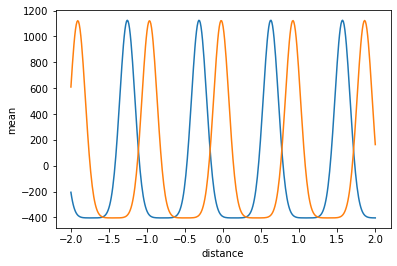

In [5]:
path = r"D:\2016_2019_MreB_Nucleoid_Organization\SIMULATIONS\Simulation_MreB_DNA_shifted_points\Results\10deg_shift"


#invert_trace = True

files = []

correlations = pd.DataFrame();
correlations_rev = pd.DataFrame();

for file in os.listdir(path):
    if file.endswith(".txt"):
        files.append(os.path.join(path, file))
        

# Here we load the data and perform the circular cross correlation

scaler = StandardScaler()
#scaler = MinMaxScaler()

for index, element in enumerate(files):
    circular_xcorr(element,scaler)

 
    
# now we want to determine the statistics and save a .csv file in the input folder

df_all = correlations.iloc[:,1:]

#interval = df.iloc[:,0]
mean_corr = df_all.mean(axis=1)
std_corr = df_all.sem(axis=1)

statistics_list = pd.DataFrame(
    {'distance': correlations['distance'],
     'mean': mean_corr,
     'sd': std_corr
    })

save_file = 'cxcorr.csv'
save_file_all = 'cxcorr_all.csv'

statistics_list.to_csv(os.path.join(path, save_file), sep='\t')
correlations.to_csv(os.path.join(path, save_file_all), sep='\t')


# now we do this for the correlation of the inverted array

df_rev_all = correlations_rev.iloc[:,1:]

#interval = df.iloc[:,0]
mean_corr_rev = df_rev_all.mean(axis=1)
std_corr_rev = df_rev_all.sem(axis=1)

statistics_rev_list = pd.DataFrame(
    {'distance': correlations['distance'],
     'mean': mean_corr_rev,
     'sd': std_corr_rev
    })

save_file = 'cxcorr_rev.csv'
save_file_all = 'cxcorr_rev_all.csv'

statistics_rev_list.to_csv(os.path.join(path, save_file), sep='\t')
correlations_rev.to_csv(os.path.join(path, save_file_all), sep='\t')

#figure = sns.lineplot(x=centered_distance, y=centered_corr, err_style='bars', ci=std_corr) # plots the circular cross correlation
figure = sns.lineplot(x='distance', y='mean', data = statistics_list) # plots the circular cross correlation
figure = sns.lineplot(x='distance', y='mean', data = statistics_rev_list)